# Data Preparation and Visualization


### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this project successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

In [69]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across states, across dealerships, and across sales channels.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. In states with dealerships, how has the distribution of sales amounts changed over time for different channels (internet vs. dealership) and sales types (low, typical, high value)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2016 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.  Attribute sales to states based on the **state in which the customer that made the purchase resides**.  This way we can capture both sales made through dealerships, as well as sales made through our website, in evaluating state-level performance.  


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [70]:
#1.1

query1 = """SELECT c.state, ROUND(SUM(sales_amount)) AS total_sales_amount
           FROM sales AS s INNER JOIN customers AS c ON s.customer_id = c.customer_id
           WHERE s.sales_transaction_date >= '2016-01-01' and c.state IS NOT NULL
           GROUP BY c.state
           ORDER BY total_sales_amount DESC"""


In [71]:
#1.2 create dataframe

sales_by_state = pd.read_sql_query(query1,engine)
sales_by_state

,state,total_sales_amount
0,CA,22515321.0
1,TX,20460753.0
2,FL,15429244.0
3,NY,11466817.0
4,PA,7354694.0
5,OH,6422793.0
6,VA,6207663.0
7,DC,5999409.0
8,MO,5656370.0
9,GA,5564254.0


In [72]:
#1.3 display top 5 performing states
top_performing_states = sales_by_state.head()
top_performing_states

,state,total_sales_amount
0,CA,22515321.0
1,TX,20460753.0
2,FL,15429244.0
3,NY,11466817.0
4,PA,7354694.0


In [73]:
#1.4 display bottom 5 performing states
bottom_performing_states = sales_by_state.tail().sort_values("total_sales_amount")
bottom_performing_states

,state,total_sales_amount
50,WY,4700.0
49,RI,8850.0
48,VT,31415.0
47,ME,103365.0
46,SD,145199.0


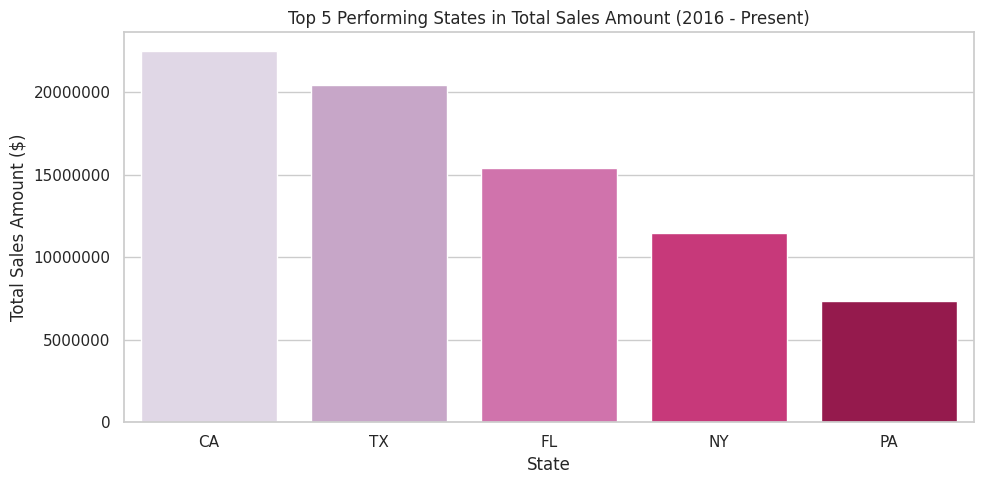

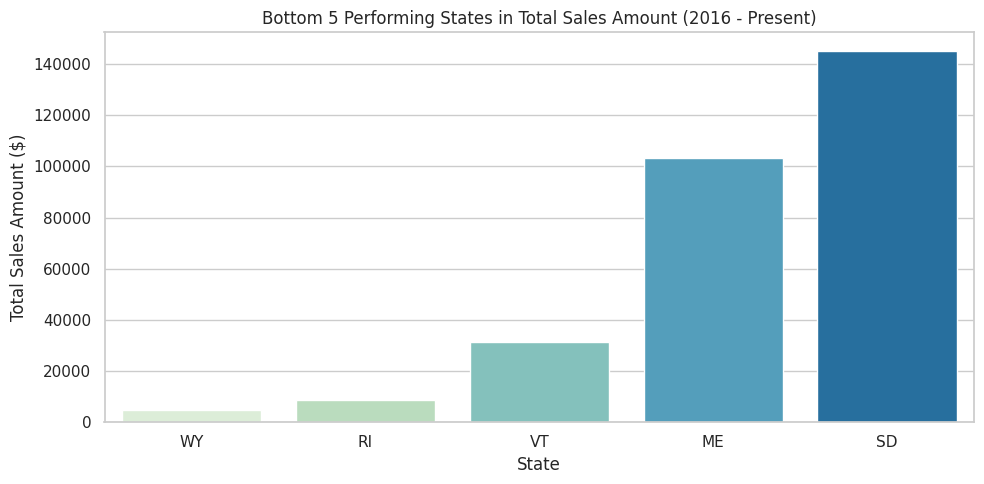

In [74]:
#1.5 visualize top and bottom performing states
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# For top performing states
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='state', y='total_sales_amount', data=top_performing_states, palette='PuRd', ax=ax)
ax.set_title('Top 5 Performing States in Total Sales Amount (2016 - Present)')
ax.set_xlabel('State')
ax.set_ylabel('Total Sales Amount ($)')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show();

# For bottom performing states
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='state', y='total_sales_amount', data=bottom_performing_states, palette='GnBu', ax=ax)
ax.set_title('Bottom 5 Performing States in Total Sales Amount (2016 - Present)')
ax.set_xlabel('State')
ax.set_ylabel('Total Sales Amount ($)')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show();




## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2016 to now.  Only include dealerships located in the *top two* states determined in Part 1.  It is OK to reference these two states by their abbreviations (e.g. AL, MS, WY) in the query you will develop below since this is a one-off request.

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`state`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2016 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `dealership_id` and `state` are replaced with appropriate text like 'ID' and 'State', etc.). 

In [75]:
#2.1
query2 = """SELECT dealership_id, state, sales_transaction_date,
    SUM(total_sales_amount) OVER (PARTITION BY dealership_id ORDER BY sales_transaction_date::DATE) AS cumulative_sales
    FROM (
        SELECT  
        s.dealership_id::INT,
        d.state,
        s.sales_transaction_date::DATE AS sales_transaction_date,
        CAST(SUM(s.sales_amount) AS numeric(10,2)) AS total_sales_amount
        FROM sales AS s INNER JOIN dealerships AS d
        ON s.dealership_id = d.dealership_id
        WHERE s.sales_transaction_date >= '2016-01-01' AND d.state IN ('CA', 'TX')
        GROUP BY s.dealership_id ,d.state, s.sales_transaction_date::DATE
        ) AS sales_dealership_summary
    ORDER BY state, dealership_id, sales_transaction_date;"""


In [76]:
#2.2
cumulative_sales_bydealership = pd.read_sql_query(query2,engine)
cumulative_sales_bydealership

,dealership_id,state,sales_transaction_date,cumulative_sales
0,2,CA,2016-01-05,499.99
1,2,CA,2016-01-07,999.98
2,2,CA,2016-01-08,1499.97
3,2,CA,2016-01-11,2499.95
4,2,CA,2016-01-16,2999.94
...,...,...,...,...
2738,19,TX,2019-05-24,6383893.46
2739,19,TX,2019-05-25,6384593.44
2740,19,TX,2019-05-28,6385293.43
2741,19,TX,2019-05-30,6385643.42


<Figure size 1000x800 with 0 Axes>

<AxesSubplot: xlabel='sales_transaction_date', ylabel='cumulative_sales'>

Text(0.5, 1.0, 'Historical Cumulative Sales by Dealership (Top 2 States-"CA","TX")')

Text(0.5, 0, 'Sales Transaction Date')

Text(0, 0.5, 'Cumulative Sales Amount')

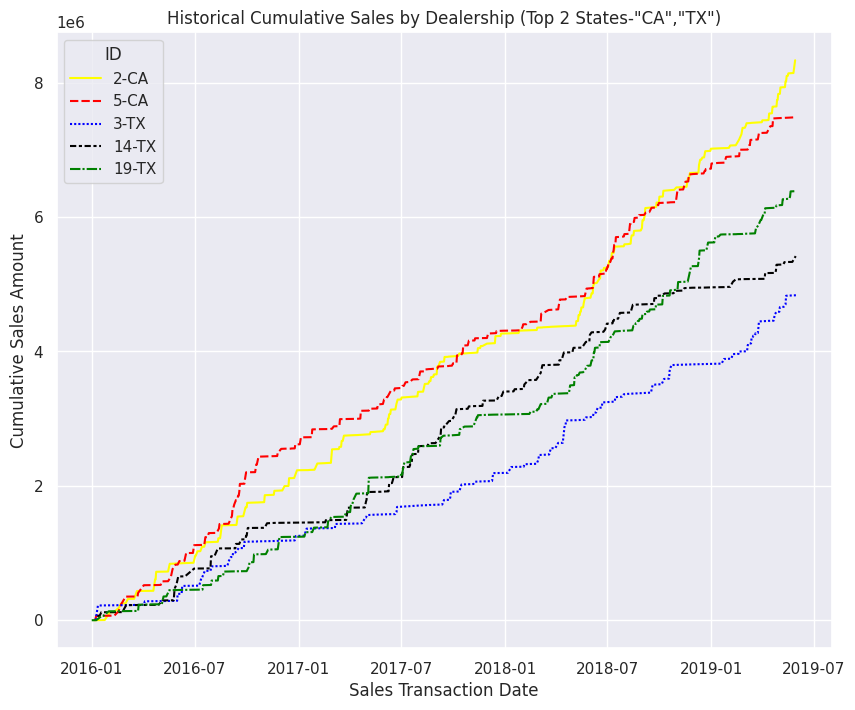

In [83]:
#2.3

cumulative_sales_bydealership['ID with State'] = cumulative_sales_bydealership['dealership_id'].astype(str) + '-' + cumulative_sales_bydealership['state']


plt.figure(figsize=(10, 8))

color = {'2-CA':'yellow','5-CA':'red','3-TX':'blue','14-TX':'black','19-TX':'green' }

sns.lineplot(x='sales_transaction_date', y='cumulative_sales', hue='ID with State', palette= color, style = 'ID with State', data=cumulative_sales_bydealership)
plt.title('Historical Cumulative Sales by Dealership (Top 2 States-"CA","TX")')
plt.xlabel('Sales Transaction Date')
plt.ylabel('Cumulative Sales Amount')
plt.legend(title='ID')
plt.grid(True)
plt.show()

## Part 3: Sales amount by sales channel and sales type

Create tables and visualizations to compare sales amounts by sales channel for sales made on or after January 1, 2016 and before January 1, 2019.  **Only include sales made to customers that reside in a state that has a dealership.** To do this, perform the following steps:
    
   1. Write a SELECT query that returns sales with a transaction date on or after January 1, 2016 and before January 1, 2019 from the `sales` table made to customers that reside in a state that has a dealership.  This table should have the following four columns: `channel`,`sales_amount`, and `sales_type` and `sales_year`. `channel` and `sales_amount` are exactly as appears in the `sales` table. `sales_type` is a derived categorical field that takes on a value of `'High value'` when `sales_amount` is above 50000, `'Typical value'` when `sales_amount` is above 10000 but less than or equal to 50000, and `'Low value'` when `sales_amount` is less than 10000.  `sales_year` is the year from the `sales_transaction_date` field.  
   
   
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_from_dealershipstates`.
   
   
   3. Appropriately visualize the distribution of sales amounts and how it changes by `channel`, `sales_year`, and `sales_type`.  To do this, create multiple plots, one for each distinct combination of `channel` and `sales_type`.  For each plot, visualize and compare the distribution of sales amounts for each sales year (2016, 2017, 2018) by superimposing these yearly distributions on the same plot.  For example, one plot will visualize distribution of sales amounts in 2016, 2017, and 2018 for low value internet sales.  Arrange the plots so that you can see changes across `channel` and `sales_type` (*Hint: seaborn.FacetGrid*). Visualizations should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, replace variable names like `sales_year` with appropriate text like 'Year', etc.). 

In [84]:
#3.1 select query
query3 = """SELECT channel, sales_amount, 
            CASE WHEN sales_amount > 50000 THEN 'High Value'
            WHEN sales_amount <= 50000 AND sales_amount > 10000 THEN 'Typical Value'
            WHEN sales_amount <= 10000 THEN 'Low Value' END as sales_type,
            EXTRACT(YEAR FROM sales_transaction_date)::INT AS sales_year
            FROM sales AS s JOIN (SELECT customer_id FROM customers WHERE state IN
            (SELECT DISTINCT state FROM dealerships)) AS c ON s.customer_id = c.customer_id
            WHERE sales_transaction_date BETWEEN '2016-01-01' AND '2019-01-01'
            ORDER by sales_year;"""


In [85]:
#3.2 create data frame
sales_from_dealershipstates = pd.read_sql_query(query3,engine)
sales_from_dealershipstates

,channel,sales_amount,sales_type,sales_year
0,internet,599.990,Low Value,2016
1,internet,499.990,Low Value,2016
2,dealership,399.992,Low Value,2016
3,internet,449.991,Low Value,2016
4,internet,599.990,Low Value,2016
...,...,...,...,...
11476,internet,699.990,Low Value,2018
11477,internet,599.990,Low Value,2018
11478,internet,479.992,Low Value,2018
11479,internet,599.990,Low Value,2018


Text(0.5, 0.98, 'Distribution of Sales amount by Channel, Sales Type, and Year')

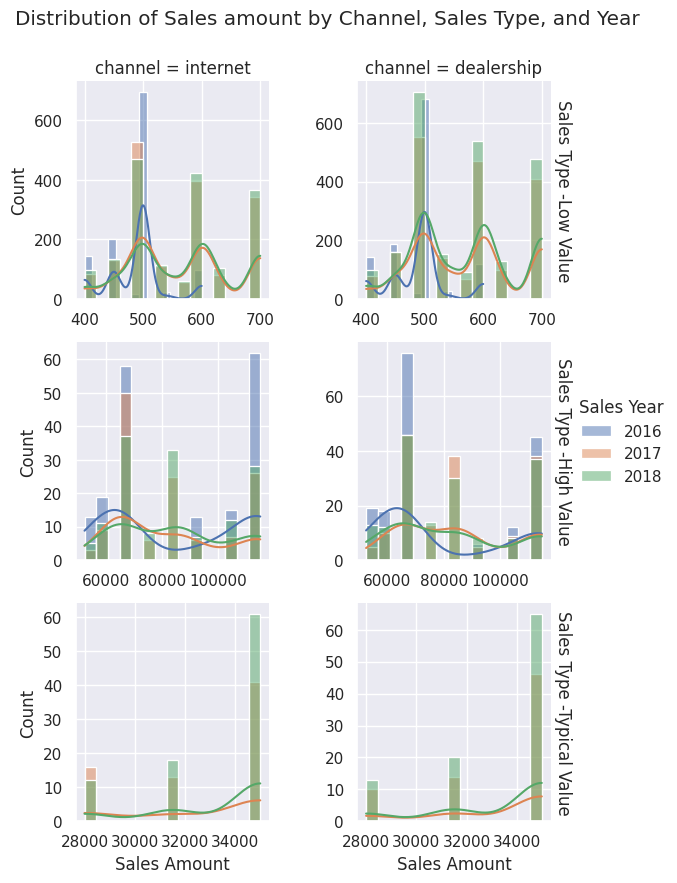

In [86]:
#3.3 visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f = sns.FacetGrid(sales_from_dealershipstates, sharex=False, sharey=False, row="sales_type", col="channel",
                  hue="sales_year", margin_titles=True, height=3)
f.map(sns.histplot, 'sales_amount', bins=15, kde=True)
f.set_axis_labels("Sales Amount", "Count")
f.set_titles(row_template= "Sales Type -{row_name}")
f.add_legend(title="Sales Year")
plt.subplots_adjust(top=.9)
f.fig.suptitle("Distribution of Sales amount by Channel, Sales Type, and Year")
plt.show()


## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 
   
   
   5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

Some potential hypotheses for why the top 5 performing states have the highest sales amounts could include:

1. Population Density: States with higher population densities such as California, Texas, Florida, New York, and Pennsylvania may naturally result in higher sales volumes due to increased customer base and market demand.
   
2. Economic Factors: Strong economic conditions in these states may lead to higher disposable incomes and consumer spending, contributing to increased sales volumes.

3. Market Peculiarities: Unique market dynamics in these states, such as consumer preferences, competitive landscape, and dealership distribution, may contribute to higher sales.

To test these hypotheses, further analysis could involve examining demographic data from the 'Customers' and 'Top_cities_data' tables to understand the customer base in each state. Additionally, analyzing economic indicators such as unemployment rates, average income levels, and consumer confidence data from external sources could provide insights into economic factors influencing sales. Furthermore, conducting market research and customer surveys to capture preferences and perceptions of the brand and products within these states would also be valuable.

It's essential to explore data on sales transactions, customer demographics, and economic indicators to evaluate the validity of these hypotheses and identify potential factors driving sales variations across states. 

 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

The bottom 5 performing states in terms of sales amounts are Vermont (VT), Rhode Island (RI), Wyoming (WY), Maine (ME), and South Dakota (SD). Here are some potential hypotheses for why these states have the lowest sales amounts:

1. Population Density: These states may have lower population densities, resulting in a smaller customer base and potentially fewer sales transactions.
2. Market Preferences: The product types offered by the dealerships or available on the website may not align with the preferences or needs of the population in these states.
3. Economic Conditions: Economic factors such as lower average income levels or economic downturns in these states could impact purchasing power and the demand for products.
4. Competition: The presence of strong local competition or neighboring states with more attractive offerings may draw potential customers away from these states.

To test these hypotheses, further analysis could involve examining demographic data from the "Top_cities_data" table for these states to understand the population distribution and potential customer base. Additionally, reviewing the "Products" table to identify the types of products sold in these states and their relevance to the local market could provide insights into market preferences. Economic indicators such as income levels, unemployment rates, and GDP data could be sourced from external databases or statistical agencies for each state to gauge the economic conditions. Lastly, analyzing the "Closest_dealerships" table may reveal the proximity of neighboring dealerships or major cities in neighboring states, shedding light on potential competition impacting sales in these states. 

By combining these datasets and performing further analyses, it will be possible to validate or refute the hypotheses and gain a deeper understanding of the underlying reasons for the lower sales amounts in these states.

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


The graphic representation of the dealership's historical performance can be described as growing or positive. The graph shows minor fluctuations, but overall the trend points in the direction of upward movement. This shows that the dealerships' main performance metrics have either increased or improved throughout the given time frame. Even though there could be periodic fluctuations, overall performance through the years is growing demonstrating the company's durability and advancement.

All of the dealerships exhibit a developing trend in the visualization, with Dealership ID 5.0 showing the most growth and Dealership ID 3.0 showing the lowest but nonetheless improving performance. This points to a generally favorable business climate. A more in-depth examination of variables like marketing tactics and outside market circumstances is necessary to comprehend the differences.

 4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 

The distribution of low-value sales (sales amounts less than 10,000) and typical-value sales (sales amounts between 10,000 and 50,000) increases over time from 2016 to 2018 for both channels. However, for high-value sales (sales amounts exceeding 50,000), there is a decrease from 2016 to 2017 followed by an increase from 2017 to 2018. Additionally, there were no transactions with typical sales values in 2016.

The number of transactions for low-value and typical-value sales types is increasing over time for both channels, with 2018 exhibiting higher density, as indicated by the green color in the graph. Conversely, for high-value sales types, there is an initial decrease followed by an increase over time for both channels. The number of transactions for the dealership channel is consistently lower than the internet channel across all three sales types.

Regarding low-value sales, the sales amounts for both channels shift from 2016 to 2018. This shift is evident in the kernel density plots, where the probability distribution for 2017 approaches that of 2018. A similar pattern is observed for typical-value and high-value sales types. Additionally, for low-value sales, the number of transactions with amounts exceeding $600 increases in 2017 and 2018.

5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

Some potential hypotheses points to compare the distribution of sales amount across channel, year and sales type are as follows-

1. Based on the Economic fluctuations and market trends, distribution of sales amount may vary for different channels for different year. For e.g. It is seen from the high value sales type graph there is some slow down in economy after 2016 which leads to the decline in high value purchases. 
2. The products with typical value range from 28000 to 34000 range are not present for year 2016. This can be because of no availablity of this higher range products in 2016 as compared to 2017 and 2018.
3. The sales amount distribution is consistent for low values till for both internet and delearship channel having no distribution for 2016 year for more than 600 sales amount.

To test this hypotheses for further analysis, we can examine the market effectiveness to understand the fluctuation in type of sales for different channels.Theses variances in marketing stratigies and effectiveness will contribute to the change in sales amount. Economic conditions can be used on the basis of stock prices to predict the purchasing power of the customers which will ultimately help in the further analysis of Low value, High Value and Typical value sales.

